<a href="https://colab.research.google.com/github/AqilulMuttaqin/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

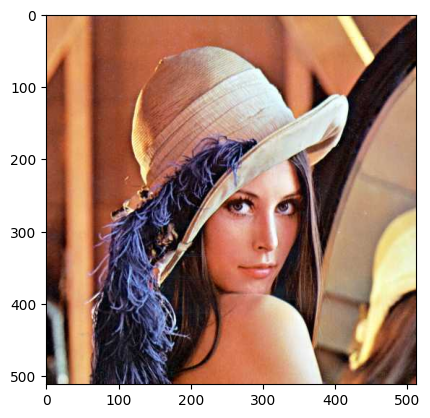

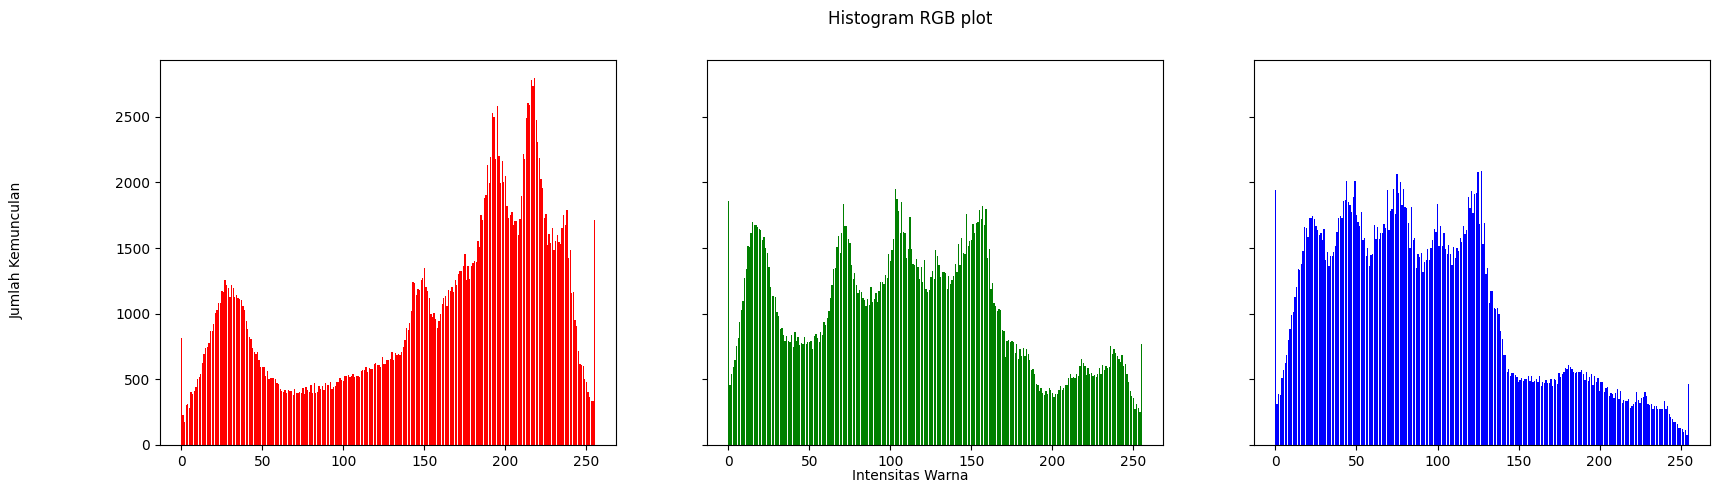

In [3]:
# 3. Membuat histogram citra seperti output histogram berdasarkan flowchart diatas

img_1 = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

height, width, depth = np.shape(img_1)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]] += 1
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

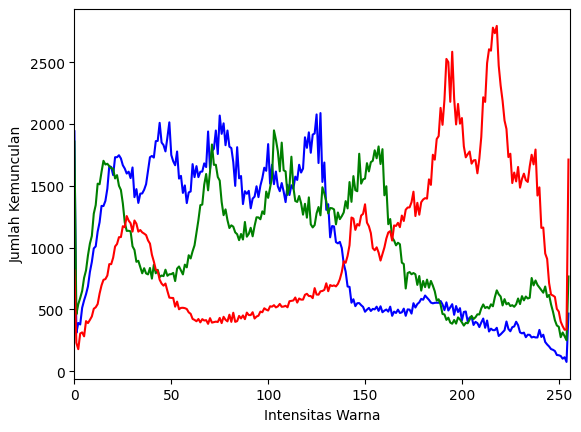

In [4]:
# 4. Membuat histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”.

colors = ("b", "g", "r")
channel_ids = (0,1,2)

# membuat histogram plot

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img_1[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

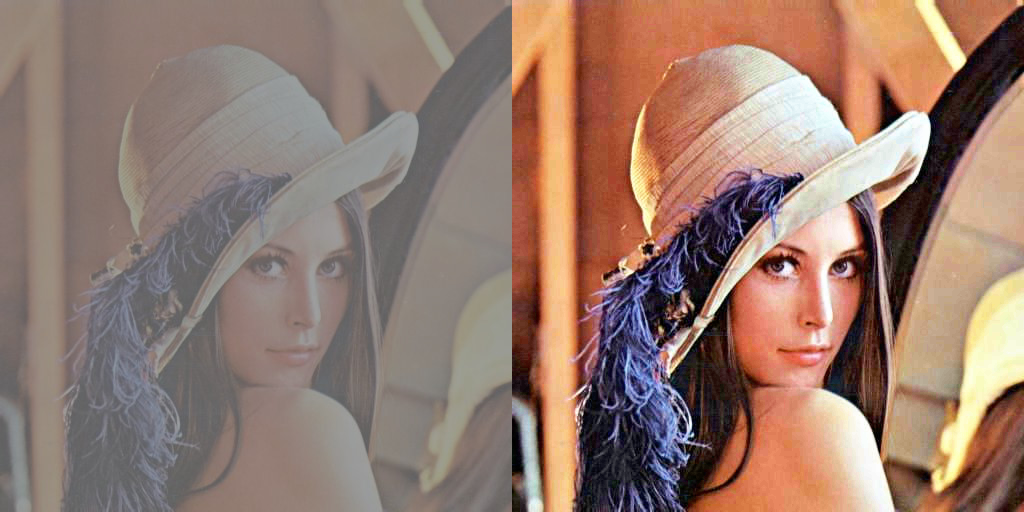

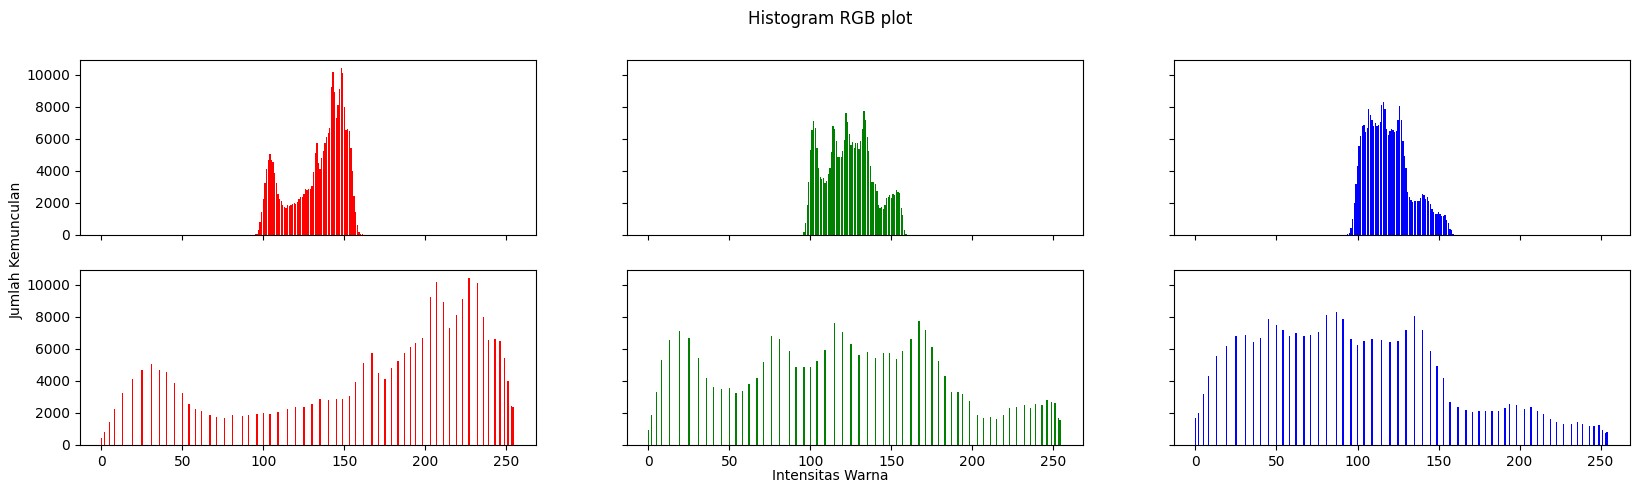

In [5]:
# 5. Membuat histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization

img1 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

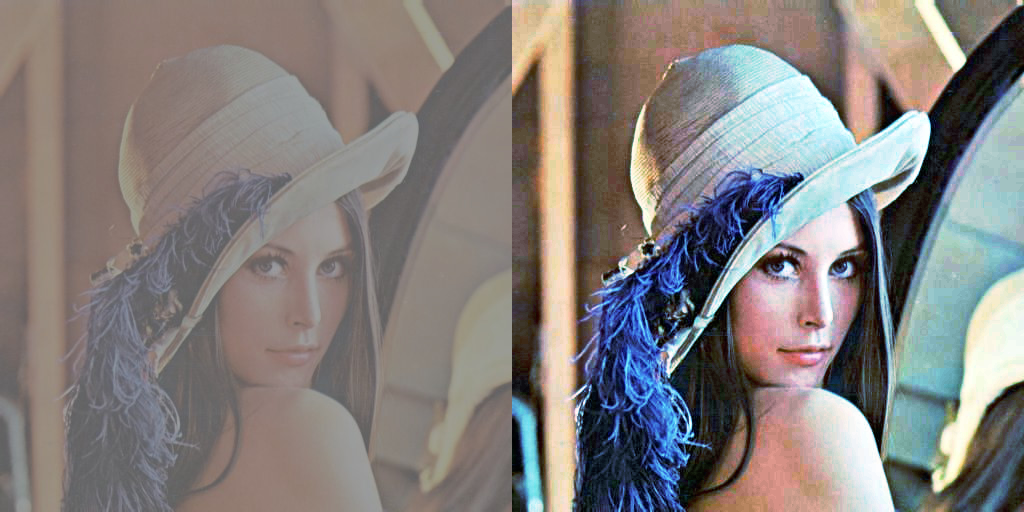

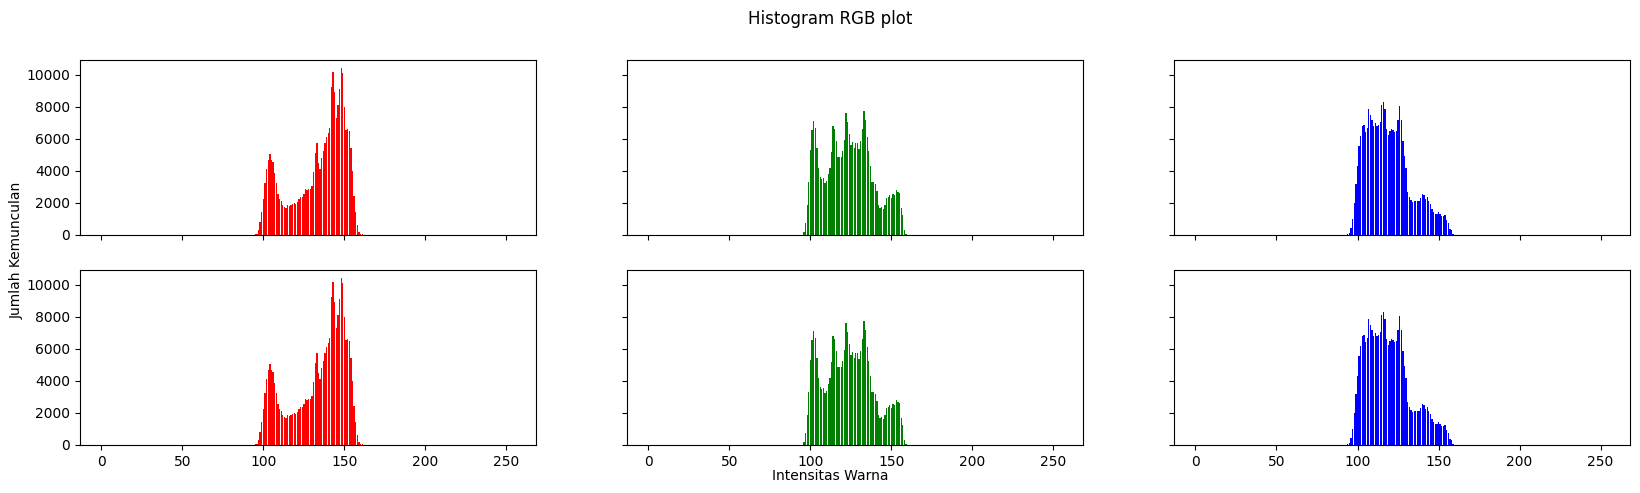

In [6]:
# 6. Membuat histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”.

channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

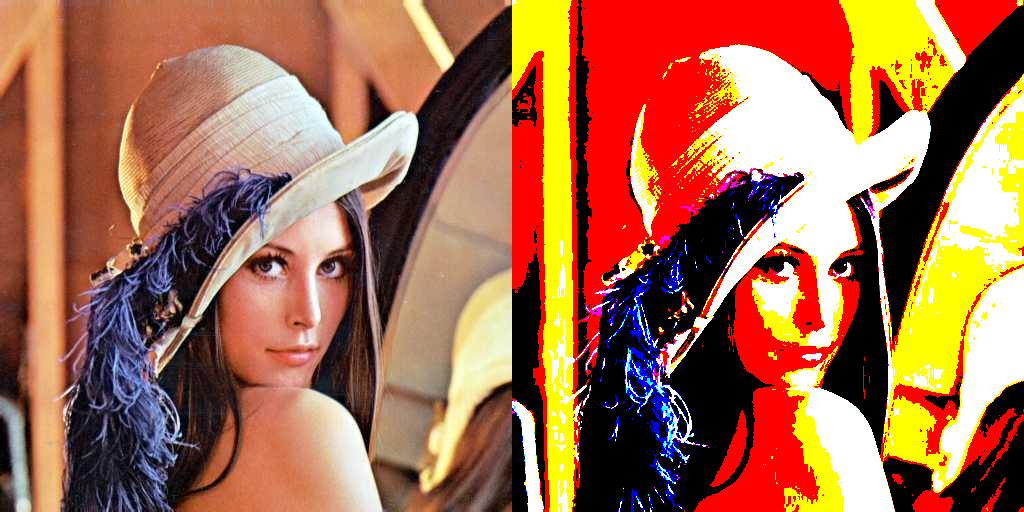

True

In [7]:
# 7. Proses pemetaan 16 juta warna RGB ke dalam 8 warna yaitu hitam, hijau, kuning, biru, cyan, magenta, putih

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/testlena.jpg', img_8)

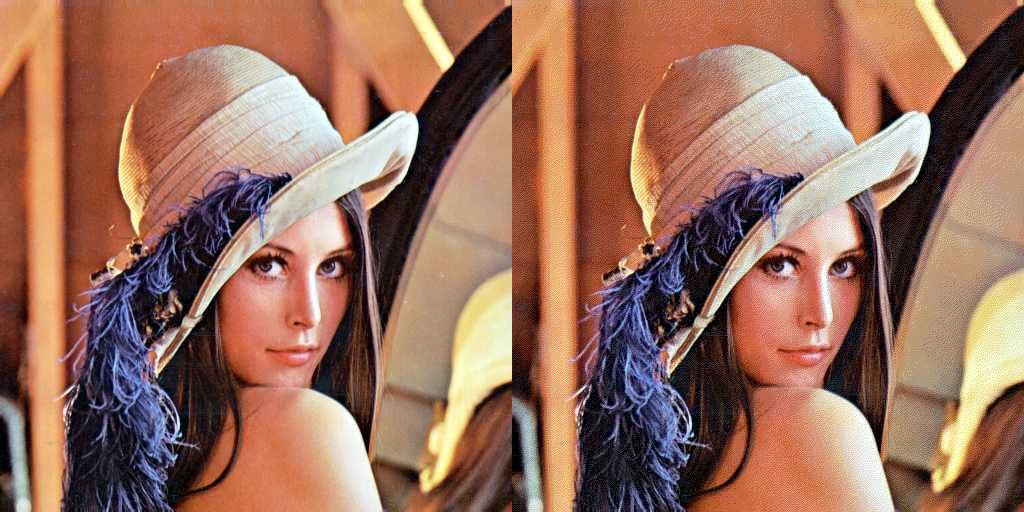

In [9]:
# 8 ( Dithering Floyd and Steinberg )
image_2 = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
image_fas = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

height, width, _ = image_2.shape

def threshold(nilai_warna):
  if(nilai_warna > 255):
    nilai_warna = 255
  elif(nilai_warna < 0):
    nilai_warna = 0

  return nilai_warna

for y in range(height - 1):
  for x in range(1, width - 1):
    pixelOld = [0,0,0]
    pixelNew = [0,0,0]
    error = [0,0,0]
    jarakPixel = 5
    for c in range(image_fas.shape[2]):
      pixelOld[c] = image_fas[y,x,c]
      pixelNew[c] = np.round(jarakPixel * pixelOld[c]/255.0) * (255/jarakPixel)
      image_fas[y,x,c] = pixelNew[c]
      error[c] = pixelOld[c] - pixelNew[c]
      image_fas[y+1,x,c] = threshold(image_fas[y+1,x,c] + error[c] * 7/16)
      image_fas[y+1,x+1,c] = threshold(image_fas[y+1,x+1,c] + error[c] * 3/16)
      image_fas[y,x+1,c] = threshold(image_fas[y,x+1,c] + error[c] * 5/16)
      image_fas[y-1,x+1,c] = threshold(image_fas[y-1,x+1,c] + error[c] * 1/16)


final_frame = cv.hconcat((image_2, image_fas))
cv2_imshow(final_frame)

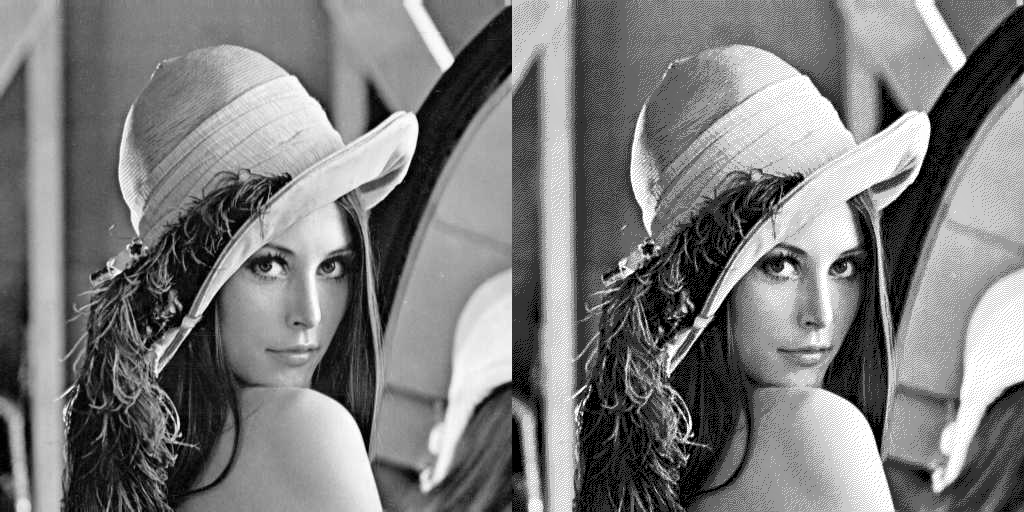

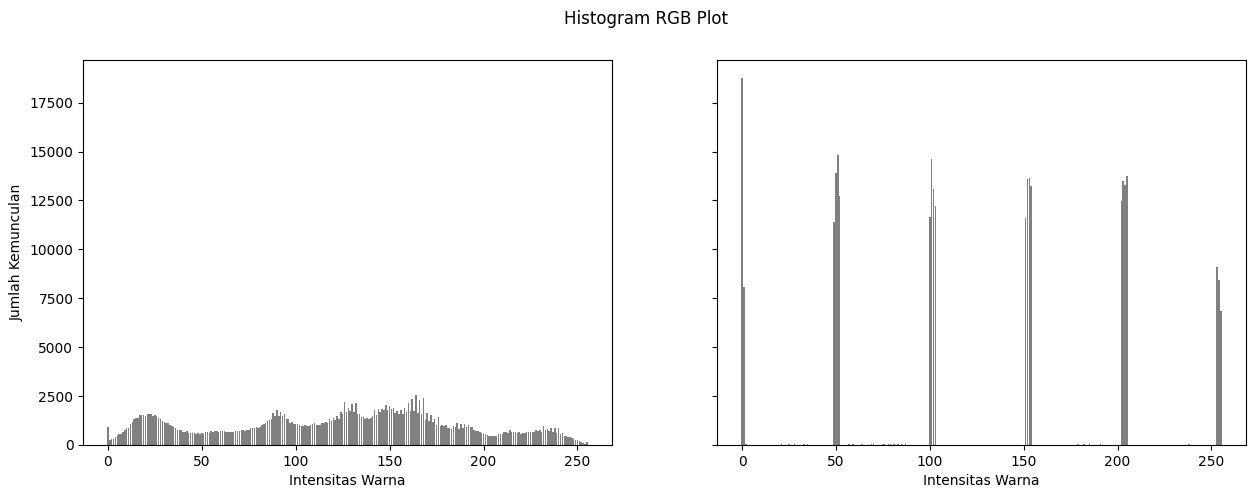

In [10]:
# 9 ( Mengbungkan Histogram Equalization dengan Dithering Floyd and Steinberg )
image_3 = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg', 0)
image_final = cv.equalizeHist(image_3)

height, width = image_3.shape

def threshold(nilai_warna):
  if(nilai_warna > 255):
    nilai_warna = 255
  elif(nilai_warna < 0):
    nilai_warna = 0

  return nilai_warna

for y in range(height - 1):
  for x in range(1, width - 1):
    pixelOld = 0
    pixelNew = 0
    error = 0
    jarakPixel = 5
    pixelOld = image_final[y,x]
    pixelNew = np.round(jarakPixel * pixelOld/255.0) * (255/jarakPixel)
    image_final[y,x] = pixelNew
    error = pixelOld - pixelNew
    image_final[y+1,x] = threshold(image_final[y+1,x] + error * 7/16)
    image_final[y+1,x+1] = threshold(image_final[y+1,x+1] + error * 3/16)
    image_final[y,x+1] = threshold(image_final[y,x+1] + error * 5/16)
    image_final[y-1,x+1] = threshold(image_final[y-1,x+1] + error * 1/16)

final_frame = cv.hconcat((image_3, image_final))
cv2_imshow(final_frame)

image_hist = [0] * 256
image_final_hist = [0] * 256
intensity = []
for i in range(256):
  intensity.append(i)

for i in range(image_final.shape[0]):
  for j in range(image_final.shape[1]):
    image_hist[image_3[i,j]] += 1
    image_final_hist[image_final[i,j]] += 1



fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

axs[0].bar(intensity, image_hist, color='gray')
axs[1].bar(intensity, image_final_hist, color='gray')
axs[1].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')
axs[0].set_xlabel('Intensitas Warna')
plt.suptitle('Histogram RGB Plot')
plt.show()